In [1]:
import pandas as pd
from algorithms.decision_trees import fit_decision_tree, print_tree, plot_tree, predict

# Classic “Play Tennis” (mixed categorical + numeric ‘Humidity’)
data = [
    ("Sunny", "Hot", 85, False, "No"),
    ("Sunny", "Hot", 80, True, "No"),
    ("Overcast", "Hot", 83, False, "Yes"),
    ("Rain", "Mild", 70, False, "Yes"),
    ("Rain", "Cool", 68, False, "Yes"),
    ("Rain", "Cool", 65, True, "No"),
    ("Overcast", "Cool", 64, True, "Yes"),
    ("Sunny", "Mild", 72, False, "No"),
    ("Sunny", "Cool", 69, False, "Yes"),
    ("Rain", "Mild", 75, False, "Yes"),
    ("Sunny", "Mild", 75, True, "Yes"),
    ("Overcast", "Mild", 72, True, "Yes"),
    ("Overcast", "Hot", 81, False, "Yes"),
    ("Rain", "Mild", 71, True, "No"),
]
cols = ["Outlook", "Temperature", "Humidity", "Windy", "Play"]
df = pd.DataFrame(data, columns=cols)

target = "Play"

In [2]:
tree = fit_decision_tree(
    df, target, max_depth=None, min_samples=1, verbose=True
)  # shows entropy & gain

➜ split on 'Outlook'  (gain=0.2467)
│   ➜ split on 'Windy' ≤ 0.50 (gain=0.9710)
│   ➜ split on 'Temperature'  (gain=0.5710)
│   │   ➜ split on 'Humidity' ≤ 73.50 (gain=1.0000)



=== Final tree ===
Outlook
│   Overcast → ★ Yes
│   Rain → Windy ≤ 0.50
│   │   ≤ → ★ Yes
│   │   > → ★ No
│   Sunny → Temperature
│   │   Cool → ★ Yes
│   │   Hot → ★ No
│   │   Mild → Humidity ≤ 73.50
│   │   │   ≤ → ★ No
│   │   │   > → ★ Yes


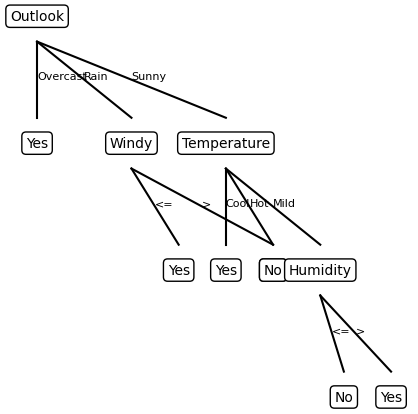

In [3]:
print("\n=== Final tree ===")
print_tree(tree)

plot_tree(tree)  # quick matplotlib doodle

In [4]:
new = pd.DataFrame(
    [{"Outlook": "Sunny", "Temperature": "Mild", "Humidity": 70, "Windy": False}]
)
print("Prediction:", predict(tree, new).iloc[0])

Prediction: No
